In [ ]:
import pandas as pd
import numpy as np
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

# vectorization

In [ ]:
kaggle = pd.read_json('News_Category_Dataset_v3.json', lines=True)


In [ ]:
news_list=list(sampled_df['short_description'])

['The former host of "The Daily Show" is the latest recipient of the Mark Twain prize for lifetime achievement in comedy.',
 '“We’re going to play all nine innings here,” the Artemis mission manager said after the first launch was scrubbed.',
 'And why Donald Trump can.',
 "The websites of Ukraine's defense, foreign and interior ministries were unreachable or painfully slow to load Thursday after a wave of distributed-denial-of-service attacks.",
 'The New York City church says its stolen 18-carat gold relic was guarded by its own security system and is irreplaceable due to its historical and artistic value.',
 'People who barely escaped the flames sorted through what was left after the blaze and investigators tried to determine its cause.',
 'Animal trainer Bhagavan "Doc" Antle was the focus of a Netflix documentary spin-off to "Tiger King" in 2021.',
 'The mocking "Daily Show" montage bids farewell to one narrative put forward on the conservative network about the Jan. 6 insurrection

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

def english_word_cut(mytext):
    stop_words = set(stopwords.words('english'))
    flag_list = ['NN', 'NNS', 'NNP', 'NNPS']  # filter all nouns

    word_list = []
    # 使用NLTK进行分词和词性标注
    tokens = word_tokenize(mytext)
    pos_tags = pos_tag(tokens)

    for token, pos in pos_tags:
        word = re.sub(r'[^\w\s]', '', token)
        if len(word) < 2 or word.lower() in stop_words:
            continue
        if pos in flag_list:
            word_list.append(word)

    return " ".join(word_list)


english_text = "This is an example sentence for English text processing."
result = english_word_cut(english_text)
print(result)


example sentence English text processing


In [ ]:
sampled_df["content_cutted"] = sampled_df['short_description'].apply(english_word_cut)

# fitting LDA model

In [ ]:
news_list=list(sampled_df['content_cutted'])
import nltk
nltk.download('punkt')
for i in range(len(news_list)):
    news = news_list[i]
    sents = sent_tokenize(news)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    news_list[i] = '. '.join(sents)

texts = [[word for word in news.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']
        for news in news_list]
dictionary = corpora.Dictionary(texts) #(word_id,word)
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq)

num_topics = 3 #The number of topics that should be generated
passes = 10
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[   (   0,
        '0.006*"kids" + 0.006*"people" + 0.006*"way" + 0.005*"day" + '
        '0.005*"twitter" + 0.005*"huffpost" + 0.004*"facebook" + 0.004*"week"'),
    (   1,
        '0.017*"time" + 0.007*"life" + 0.006*"day" + 0.006*"things" + '
        '0.006*"trump" + 0.005*"love" + 0.005*"people" + 0.005*"family"'),
    (   2,
        '0.010*"people" + 0.008*"new" + 0.008*"president" + 0.006*"trump" + '
        '0.006*"health" + 0.005*"house" + 0.005*"year" + 0.005*"york"')]


In [ ]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=i,
              passes=passes)
    perplexity = lda.log_perplexity(corpus)
    plexs.append(perplexity)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


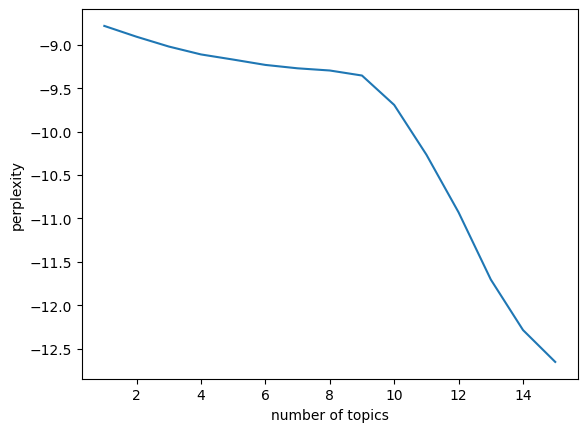

In [ ]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

In [ ]:
from gensim.models import CoherenceModel
for i in range(1,16):
    print(i)
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=i,
              passes=passes)
    doc_topic_distrib = [lda[doc] for doc in corpus]
    coherence_model = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    print("Coherence Score:", coherence_score)

1
Coherence Score: -6.06377180479103
2
Coherence Score: -6.960565887474305
3
Coherence Score: -8.296028064999847
4
Coherence Score: -9.235309527448871
5
Coherence Score: -10.282580829442685
6
Coherence Score: -11.337902108946428
7
Coherence Score: -12.025293793366455
8
Coherence Score: -12.303182996435392
9
Coherence Score: -12.378737682032588
10
Coherence Score: -13.372735509221886
11
Coherence Score: -13.411102924778474
12
Coherence Score: -14.552781196471264
13
Coherence Score: -14.680214663826131
14
Coherence Score: -15.343400981548028
15
Coherence Score: -15.345546634324489


# Another package

In [ ]:
sampled_df["content_cutted"] = sampled_df['short_description'].apply(english_word_cut)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [ ]:
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(sampled_df["content_cutted"])

In [ ]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=8,
                          random_state=0)

In [ ]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names_out()  # Use get_feature_names_out instead of get_feature_names
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
people time house things states white lot child united secretary committee senator lady questions board law daughter president countries florida internet staff press tv olympics
Topic #1:
way children family kids school women officials food parents home rights group media case war days sunday information authorities health lives list years members california
Topic #2:
trump president donald court coronavirus party election power gop season person decision administration pandemic republicans obama director experts hours supreme course mom deal year control
Topic #3:
state country history republican night nation government change plan job movie climate years texas candidate saturday monday senate study governor career gun decades voters movement
Topic #4:
new years city york twitter times america huffpost facebook company water americans music style game fear year instagram week cancer minister line divorce opportunity actress
Topic #5:
life love thing today work actor justice 

In [ ]:
lda.perplexity(tf)

939.4009036883714

In [ ]:
lda.score(tf)

-240617.11333786967

In [ ]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


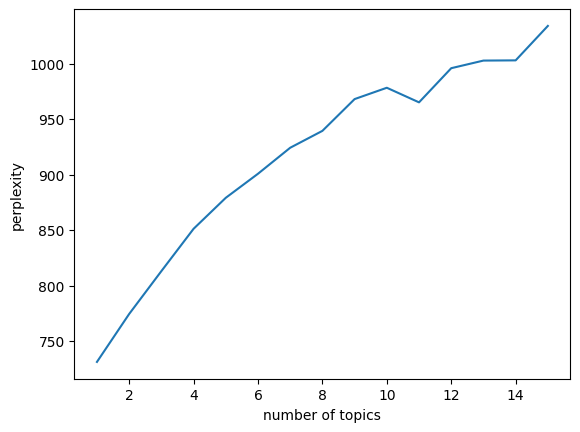

In [ ]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

In [ ]:
for i in range(len(news_list)):
    news = news_list[i]
    sents = sent_tokenize(news)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    news_list[i] = '. '.join(sents)
news_list
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(sampled_df["content_cutted"])
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)